In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('manufacturing_data.csv')
df.head()

,recordDate,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
0,2/24/2015,Q4,Stitching Unit,Tuesday,Line-S1,0.6,22.53,708.0,5040,0,0.0,0,Minor Style Revision,42.0,0.268214
1,1/19/2015,Q3,Stitching Unit,Monday,Line-F3,0.8,11.41,1028.0,4380,50,0.0,0,No Style Change,31.0,0.800359
2,01-06-2015,Q1,Finishing & Quality,Tuesday,Line-C2,0.8,2.90,NaN,1440,0,0.0,0,No Style Change,8.0,0.681061
3,2/24/2015,Q4,Finishing & Quality,Tuesday,Line-S2,0.7,3.90,NaN,960,0,0.0,0,No Style Change,8.0,0.325000
4,01-04-2015,Q1,Finishing & Quality,Sunday,Line-C1,0.8,2.90,NaN,960,0,0.0,0,No Style Change,8.0,0.667604


In [3]:
df.shape

(1197, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   recordDate           1197 non-null   object 
 1   fiscalQuarter        1197 non-null   object 
 2   productionDept       1197 non-null   object 
 3   dayOfWeek            1197 non-null   object 
 4   team                 1197 non-null   object 
 5   plannedEfficiency    1197 non-null   float64
 6   standardMinuteValue  1197 non-null   float64
 7   workInProgress       691 non-null    float64
 8   overtimeMinutes      1197 non-null   int64  
 9   performanceBonus     1197 non-null   int64  
 10  idleMinutes          1197 non-null   float64
 11  idleWorkers          1197 non-null   int64  
 12  styleChangeCount     1197 non-null   object 
 13  workerCount          1197 non-null   float64
 14  efficiencyScore      1197 non-null   float64
dtypes: float64(6), int64(3), object(6)
mem

In [5]:
df.describe()

,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,workerCount,efficiencyScore
count,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,34.609858,0.735091
std,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,22.197687,0.174488
min,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,57.000000,0.850253
max,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,89.000000,1.120437


In [6]:
df = df[df['productionDept'] != 'Stitching Unit']
df.head()

,recordDate,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
2,01-06-2015,Q1,Finishing & Quality,Tuesday,Line-C2,0.8,2.90,NaN,1440,0,0.0,0,No Style Change,8.0,0.681061
3,2/24/2015,Q4,Finishing & Quality,Tuesday,Line-S2,0.7,3.90,NaN,960,0,0.0,0,No Style Change,8.0,0.325000
4,01-04-2015,Q1,Finishing & Quality,Sunday,Line-C1,0.8,2.90,NaN,960,0,0.0,0,No Style Change,8.0,0.667604
6,2/26/2015,Q4,Finishing & Quality,Thursday,Line-S1,0.5,3.94,NaN,3360,0,0.0,0,No Style Change,8.0,0.768847
7,2/28/2015,Q4,Finishing & Quality,Saturday,Line-S1,0.5,3.94,NaN,3360,0,0.0,0,No Style Change,8.0,0.768847


In [7]:
df['productionDept'].value_counts()

productionDept
 Finishing & Quality     257
Finishing & Quality      249
Name: count, dtype: int64

In [8]:
df = df.drop(columns=['recordDate', 'productionDept'])
df.head()

,fiscalQuarter,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
2,Q1,Tuesday,Line-C2,0.8,2.90,NaN,1440,0,0.0,0,No Style Change,8.0,0.681061
3,Q4,Tuesday,Line-S2,0.7,3.90,NaN,960,0,0.0,0,No Style Change,8.0,0.325000
4,Q1,Sunday,Line-C1,0.8,2.90,NaN,960,0,0.0,0,No Style Change,8.0,0.667604
6,Q4,Thursday,Line-S1,0.5,3.94,NaN,3360,0,0.0,0,No Style Change,8.0,0.768847
7,Q4,Saturday,Line-S1,0.5,3.94,NaN,3360,0,0.0,0,No Style Change,8.0,0.768847


In [9]:
df.isnull().sum()

fiscalQuarter            0
dayOfWeek                0
team                     0
plannedEfficiency        0
standardMinuteValue      0
workInProgress         506
overtimeMinutes          0
performanceBonus         0
idleMinutes              0
idleWorkers              0
styleChangeCount         0
workerCount              0
efficiencyScore          0
dtype: int64

In [10]:
df.shape

(506, 13)

In [11]:
df = df.drop(columns=['workInProgress'])
df.head()

,fiscalQuarter,dayOfWeek,team,plannedEfficiency,standardMinuteValue,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
2,Q1,Tuesday,Line-C2,0.8,2.90,1440,0,0.0,0,No Style Change,8.0,0.681061
3,Q4,Tuesday,Line-S2,0.7,3.90,960,0,0.0,0,No Style Change,8.0,0.325000
4,Q1,Sunday,Line-C1,0.8,2.90,960,0,0.0,0,No Style Change,8.0,0.667604
6,Q4,Thursday,Line-S1,0.5,3.94,3360,0,0.0,0,No Style Change,8.0,0.768847
7,Q4,Saturday,Line-S1,0.5,3.94,3360,0,0.0,0,No Style Change,8.0,0.768847


In [12]:
df['performanceBonus'].value_counts()

performanceBonus
0       496
960       5
1200      1
1440      1
3600      1
1080      1
2880      1
Name: count, dtype: int64

In [13]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()['efficiencyScore'].sort_values(ascending=False)
print(corr_matrix)

efficiencyScore        1.000000
workerCount            0.274002
standardMinuteValue    0.205018
plannedEfficiency      0.097510
overtimeMinutes        0.049609
performanceBonus       0.013277
idleMinutes                 NaN
idleWorkers                 NaN
Name: efficiencyScore, dtype: float64


In [14]:
df['idleMinutes'].value_counts()

idleMinutes
0.0    506
Name: count, dtype: int64

In [15]:
df['idleWorkers'].value_counts()

idleWorkers
0    506
Name: count, dtype: int64

In [16]:
df['styleChangeCount'].value_counts()

styleChangeCount
No Style Change    506
Name: count, dtype: int64

In [17]:
df = df.drop(columns=['idleMinutes', 'idleWorkers', 'styleChangeCount', 'performanceBonus'])
df.head()

,fiscalQuarter,dayOfWeek,team,plannedEfficiency,standardMinuteValue,overtimeMinutes,workerCount,efficiencyScore
2,Q1,Tuesday,Line-C2,0.8,2.90,1440,8.0,0.681061
3,Q4,Tuesday,Line-S2,0.7,3.90,960,8.0,0.325000
4,Q1,Sunday,Line-C1,0.8,2.90,960,8.0,0.667604
6,Q4,Thursday,Line-S1,0.5,3.94,3360,8.0,0.768847
7,Q4,Saturday,Line-S1,0.5,3.94,3360,8.0,0.768847


In [18]:
df.shape

(506, 8)

In [19]:
df['fiscalQuarter'].value_counts()

fiscalQuarter
Q1    149
Q2    147
Q4    108
Q3     81
Q5     21
Name: count, dtype: int64

In [20]:
df['dayOfWeek'].value_counts()

dayOfWeek
Wednesday    89
Sunday       87
Tuesday      83
Saturday     83
Monday       83
Thursday     81
Name: count, dtype: int64

In [21]:
df['team'].value_counts()

team
Line-C2    53
Line-S2    52
Line-S1    49
Line-F1    46
Line-Q1    46
Line-Q2    43
Line-C1    41
Line-P2    40
Line-S3    37
Line-F2    35
Line-F3    35
Line-P1    29
Name: count, dtype: int64

In [22]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()['efficiencyScore'].sort_values(ascending=False)
print(corr_matrix)

efficiencyScore        1.000000
workerCount            0.274002
standardMinuteValue    0.205018
plannedEfficiency      0.097510
overtimeMinutes        0.049609
Name: efficiencyScore, dtype: float64


In [23]:
df.head()

,fiscalQuarter,dayOfWeek,team,plannedEfficiency,standardMinuteValue,overtimeMinutes,workerCount,efficiencyScore
2,Q1,Tuesday,Line-C2,0.8,2.90,1440,8.0,0.681061
3,Q4,Tuesday,Line-S2,0.7,3.90,960,8.0,0.325000
4,Q1,Sunday,Line-C1,0.8,2.90,960,8.0,0.667604
6,Q4,Thursday,Line-S1,0.5,3.94,3360,8.0,0.768847
7,Q4,Saturday,Line-S1,0.5,3.94,3360,8.0,0.768847


Data Visualization 

In [24]:
features = df.drop(columns=['efficiencyScore'])
numerical_features = ['plannedEfficiency', 'standardMinuteValue', 'overtimeMinutes', 'workerCount']
categorical_features = ['fiscalQuarter', 'dayOfWeek', 'team']
target = 'efficiencyScore'

C:\Users\admin\AppData\Local\Temp\ipykernel_6384\4162117007.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df[target], palette='Set2')


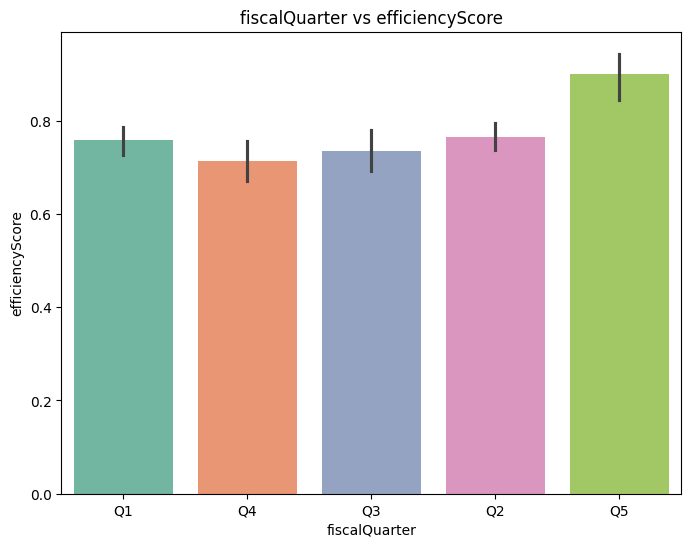

C:\Users\admin\AppData\Local\Temp\ipykernel_6384\4162117007.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df[target], palette='Set2')


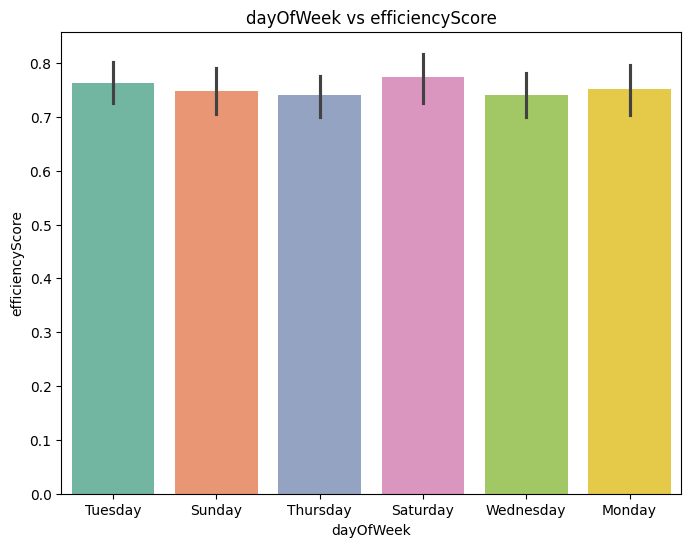

C:\Users\admin\AppData\Local\Temp\ipykernel_6384\4162117007.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df[target], palette='Set2')


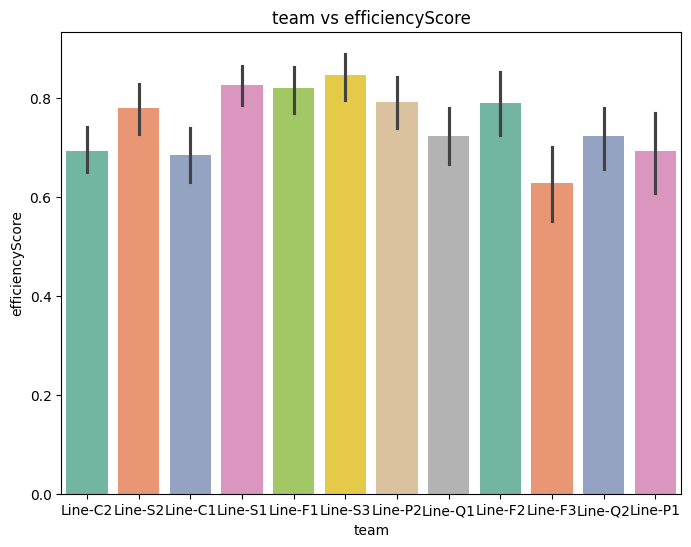

C:\Users\admin\AppData\Local\Temp\ipykernel_6384\4162117007.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df[target], palette='Set2')


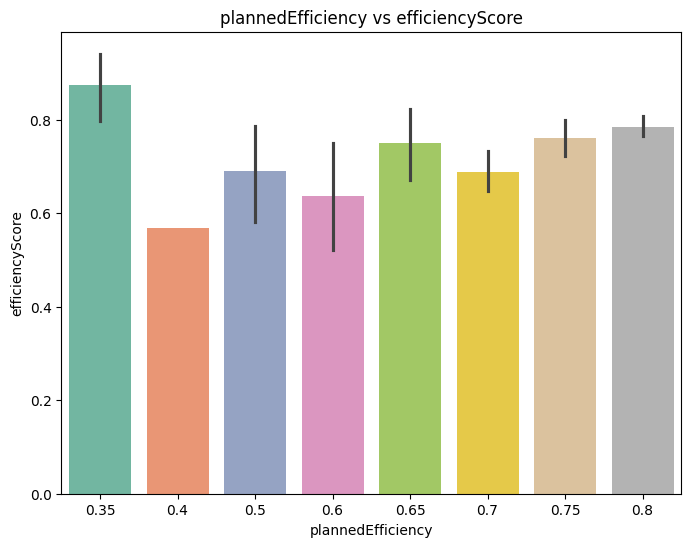

C:\Users\admin\AppData\Local\Temp\ipykernel_6384\4162117007.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df[target], palette='Set2')


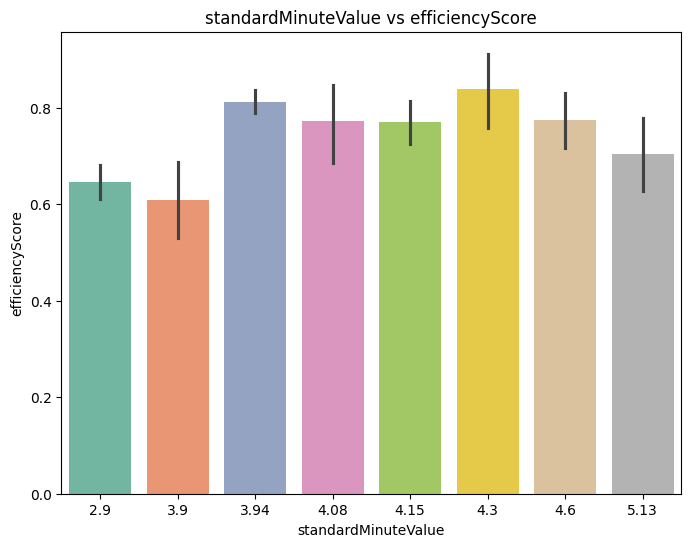

C:\Users\admin\AppData\Local\Temp\ipykernel_6384\4162117007.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df[target], palette='Set2')


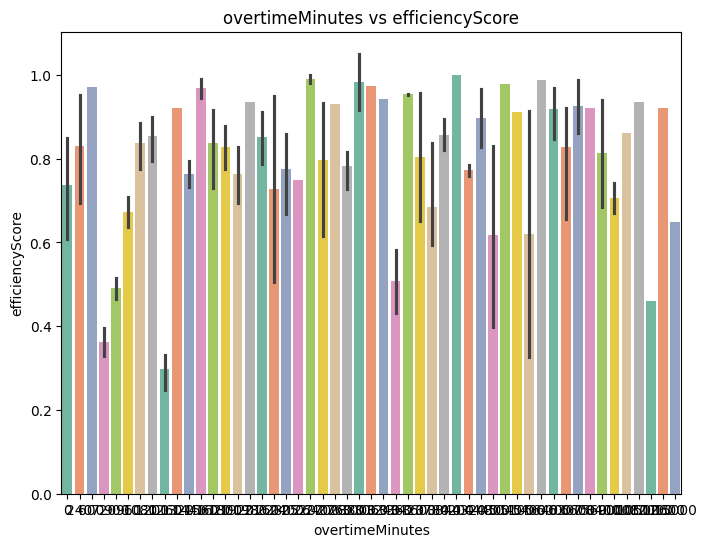

C:\Users\admin\AppData\Local\Temp\ipykernel_6384\4162117007.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df[target], palette='Set2')


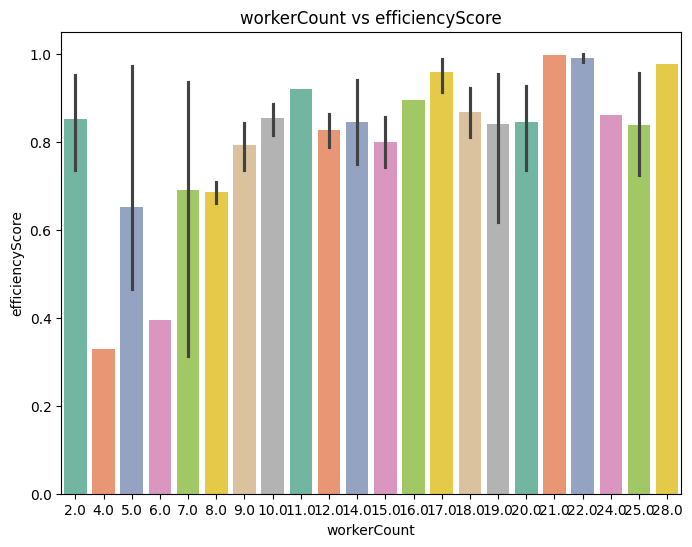

In [25]:
for col in features:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=df[col], y=df[target], palette='Set2')
    plt.title(f'{col} vs {target}')
    plt.show()

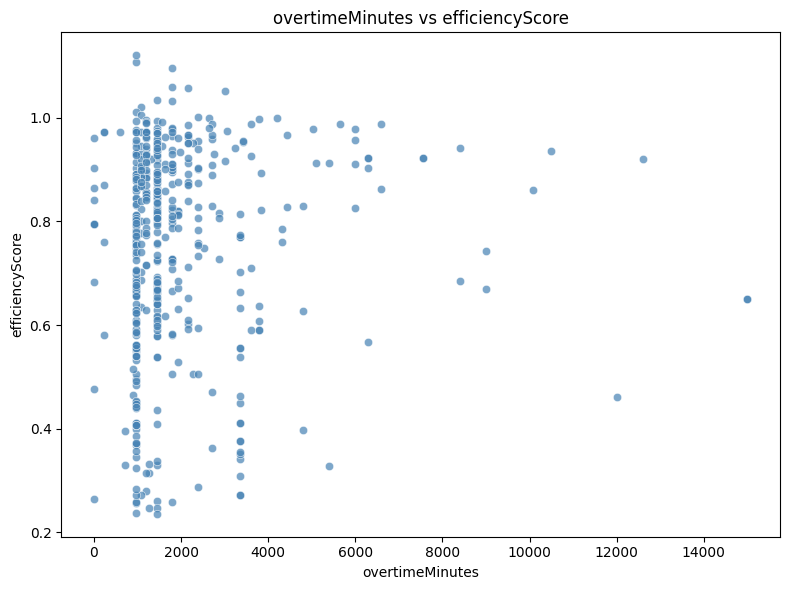

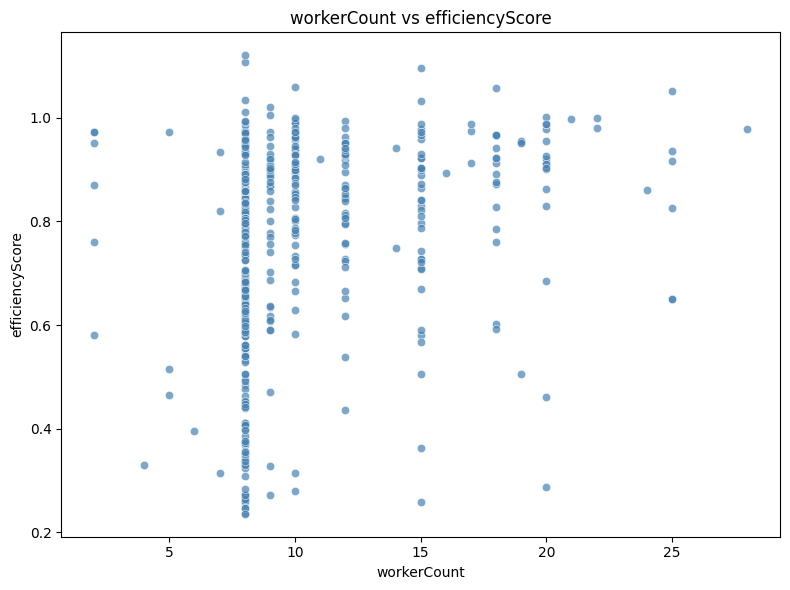

In [26]:
for col in numerical_features[2:]:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[col], y=df[target], alpha=0.7, color='steelblue')
    plt.title(f'{col} vs {target}')
    plt.xlabel(col)
    plt.ylabel(target)
    plt.tight_layout()
    plt.show()

Splitting Features and Target

In [27]:
X = df[['fiscalQuarter', 'dayOfWeek', 'team', 'plannedEfficiency', 'standardMinuteValue', 'overtimeMinutes', 'workerCount']]
y = df['efficiencyScore']

Train Test Split


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((404, 7), (102, 7))

Encoding Categorical Features

In [29]:
numerical_features = ['plannedEfficiency', 'standardMinuteValue', 'overtimeMinutes', 'workerCount']
categorical_features = ['fiscalQuarter', 'dayOfWeek', 'team']
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False)
X_train_cat = ohe.fit_transform(X_train[categorical_features])
X_test_cat = ohe.transform(X_test[categorical_features])
print(np.hstack((X_train[numerical_features].values, X_train_cat)).shape)

(404, 24)


In [30]:
X_train_final = pd.DataFrame(
    np.hstack((X_train[numerical_features].values, X_train_cat)),
    columns = numerical_features + list(ohe.get_feature_names_out(categorical_features))
)

X_test_final = pd.DataFrame(
    np.hstack((X_test[numerical_features].values, X_test_cat)),
    columns = numerical_features + list(ohe.get_feature_names_out(categorical_features))
)

Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_final), columns=X_train_final.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_final), columns=X_test_final.columns)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

Linear Regression on Scaled Features

In [33]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)


print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Train R²: 0.21759011085447388
Test R²: 0.25429648602420385
Train MAE: 0.13716629894542598
Test MAE: 0.1290477728388037
Train RMSE: 0.17557896682038013
Test RMSE: 0.1633556228498671


In [34]:
scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=3, scoring='r2')
print("CV R²:", scores.mean())

CV R²: 0.09946925356158003


Linear Regression on Unscaled Features

In [36]:
lr_model = LinearRegression()
lr_model.fit(X_train_final, y_train)

y_train_pred = lr_model.predict(X_train_final)
y_test_pred = lr_model.predict(X_test_final)


print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))


Train R²: 0.217590110854474
Test R²: 0.2542964860242075
Train MAE: 0.1371662989454256
Test MAE: 0.12904777283880417
Train RMSE: 0.17557896682038013
Test RMSE: 0.16335562284986668


In [37]:
scores = cross_val_score(lr_model, X_train_final, y_train, cv=3, scoring='r2')
print("CV R²:", scores.mean())


CV R²: 0.09946925356158405


RandomForest Regression

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train_final, y_train)
y_train_pred = rf_model.predict(X_train_final)
y_test_pred = rf_model.predict(X_test_final)

In [39]:
# R²
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

# MAE
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

# RMSE
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Train R²: 0.8867182203001756
Test R²: 0.2019076091208123
Train MAE: 0.05060122074913364
Test MAE: 0.12530241552088225
Train RMSE: 0.06680905907569798
Test RMSE: 0.1689964486033981


In [40]:
cv_r2 = cross_val_score(rf_model, X_train_final, y_train, cv=5, scoring='r2')
print("CV R² (mean):", cv_r2.mean())
cv_r2 = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='r2')
print("CV R² (mean):", cv_r2.mean())

CV R² (mean): 0.13056168531800796
CV R² (mean): 0.12841704661126244


HyperParameter Tuning Using GridSearchCV

In [42]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_final, y_train)
best_rf_model = grid_search.best_estimator_
print(best_rf_model)
y_train_pred = best_rf_model.predict(X_train_final)
y_test_pred = best_rf_model.predict(X_test_final)

RandomForestRegressor(max_depth=20, min_samples_split=10)


In [43]:
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Train R²: 0.650992510820247
Test R²: 0.32510024790023695
Train MAE: 0.08879649776538501
Test MAE: 0.1162288565772747
Train RMSE: 0.11726615806623296
Test RMSE: 0.15540701808605994


In [44]:
cv_r2 = cross_val_score(best_rf_model, X_train_final, y_train, cv=5, scoring='r2')
print("CV R² (mean):", cv_r2.mean())
cv_r2 = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=5, scoring='r2')
print("CV R² (mean):", cv_r2.mean())


CV R² (mean): 0.1702980376632614
CV R² (mean): 0.18720056626897735


RandomForest After Using HyperParameter Tuning

In [45]:
rf_model = RandomForestRegressor(max_depth=20, min_samples_split=10)
rf_model.fit(X_train_final, y_train)
y_train_pred = rf_model.predict(X_train_final)
y_test_pred = rf_model.predict(X_test_final)

In [46]:
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Train R²: 0.6503326740350033
Test R²: 0.32050490502911444
Train MAE: 0.08795176760286176
Test MAE: 0.11736985053871443
Train RMSE: 0.1173769579623554
Test RMSE: 0.15593519801598738


In [47]:
cv_r2 = cross_val_score(best_rf_model, X_train_final, y_train, cv=5, scoring='r2')
print("CV R² (mean):", cv_r2.mean())
cv_r2 = cross_val_score(best_rf_model, X_test_scaled, y_test, cv=5, scoring='r2')
print("CV R² (mean):", cv_r2.mean())

CV R² (mean): 0.1845623072815508
CV R² (mean): 0.12298380350543363


Gradient Boosting

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train_final, y_train)

y_train_pred = gbr.predict(X_train_final)
y_test_pred = gbr.predict(X_test_final)

In [49]:
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Train R²: 0.6021566567504852
Test R²: 0.2670105915779496
Train MAE: 0.09309865030947874
Test MAE: 0.12224740603431666
Train RMSE: 0.12520203029720162
Test RMSE: 0.16195704442506073


In [51]:
cv_r2 = cross_val_score(gbr, X_train_final, y_train, cv=5, scoring='r2')
print("CV R² (mean):", cv_r2.mean())
cv_r2 = cross_val_score(gbr, X_train_scaled, y_train, cv=5, scoring='r2')
print("CV R² (mean):", cv_r2.mean())

CV R² (mean): 0.13596400189647734
CV R² (mean): 0.1342193753472024
